In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from time import time
import sompy
%matplotlib inline

CACHEDIR=C:\Users\hoek.HKV\.matplotlib
Using fontManager instance from C:\Users\hoek.HKV\.matplotlib\fontList.json
backend module://ipykernel.pylab.backend_inline version unknown
backend module://ipykernel.pylab.backend_inline version unknown
backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
file_shp = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\Stations_total_v3.shp'
file_csv = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\BN_data_full.csv'

In [3]:
# read and parse data
df = pd.read_csv(file_csv,sep=';', decimal=',')
df.replace(np.inf, 0, inplace=True)
df.replace(np.nan, 0, inplace=True)

shp_key = df['WSO1_ID'].copy()
# exclude some columns
df = df[df.columns.difference(['OBJECTID', 'Station_ID','WSO1_ID','Catchment_ID','Indicator_of_daily_discharge_availability'])]
df = df.astype(np.float32)

In [4]:
df.head(10)

Annual_maxima_of_daily_discharge  Annual_maxima_of_daily_precipitation  \
0                              7.46                             28.798899   
1                             10.50                             33.087471   
2                              8.75                             33.962662   
3                              8.31                             28.224432   
4                              8.08                             51.569351   
5                             11.60                             33.257034   
6                              9.23                             23.059937   
7                             10.50                             30.943502   
8                             10.60                             27.746513   
9                              5.61                             24.619263   

   Annual_maxima_of_daily_precipitation_and_snowmelt  \
0                                          53.799698   
1                                          33.146503   
2                                          34.116840   
3                                          28.224432   
4                                          51.569351   
5                                          33.257034   
6                                          33.968506   
7                                          32.758217   
8                                          33.357349   
9                                          38.899036   

   Annual_maxima_of_daily_snowmelt  \
0                        51.204853   
1                        21.040306   
2                        12.289010   
3                        12.579762   
4                        23.977259   
5                        14.738074   
6                        31.074389   
7                        28.889370   
8                        25.573589   
9                        31.540670   

   Annual_maxima_of_daily_total_runoff_coefficient  \
0                                         0.992210   
1                                         0.593966   
2                                         0.529617   
3                                         0.533033   
4                                         0.534044   
5                                         0.423687   
6                                         0.997365   
7                                         0.887855   
8                                         0.798334   
9                                         0.999261   

   Annual_mean_of_daily_discharge  \
0                        0.923197   
1                        2.148729   
2                        1.384836   
3                        1.694277   
4                        3.006746   
5                        2.113751   
6                        1.873718   
7                        2.418375   
8                        3.030926   
9                        1.194257   

   Annual_mean_of_daily_near-surface_air_temperature  \
0                                         277.346313   
1                                         278.410156   
2                                         278.711853   
3                                         278.446747   
4                                         277.322723   
5                                         278.906830   
6                                         277.264709   
7                                         276.434021   
8                                         278.249084   
9                                         277.848846   

   Annual_mean_of_daily_precipitation  \
0                            2.260450   
1                            1.878416   
2                            1.844083   
3                            1.807386   
4                            2.517452   
5                            1.918723   
6                            1.419631   
7                            1.808543   
8                            2.010400   
9                            1.794903   

   Annual_mean_of_daily_total_runoff_coefficien

In [5]:
df.columns

Index(['Annual_maxima_of_daily_discharge',
       'Annual_maxima_of_daily_precipitation',
       'Annual_maxima_of_daily_precipitation_and_snowmelt',
       'Annual_maxima_of_daily_snowmelt',
       'Annual_maxima_of_daily_total_runoff_coefficient',
       'Annual_mean_of_daily_discharge',
       'Annual_mean_of_daily_near-surface_air_temperature',
       'Annual_mean_of_daily_precipitation',
       'Annual_mean_of_daily_total_runoff_coefficient', 'Area',
       'Average_elevation', 'Average_water_capacity', 'Build-up_areas',
       'Circularity', 'Clay', 'Confidence', 'Eolian_deposits', 'Forests',
       'Glaciers', 'Gravel', 'Irrigated_agriculture', 'Lakes', 'Marshes',
       'Peat', 'River_network_density', 'River_slopeness', 'Sand', 'Silt',
       'Slopeness_(average)', 'Soil_sealing',
       'Soil_texture_(dimensionless_index_from_1_to_13)',
       'Steepness_(equation)', 'Time_of_concentration', 'Total_area',
       'Unconsolidated_deposits'],
      dtype='object')

In [64]:
# standardize matrix
X = df.as_matrix()
# _mu = np.nanmean(X, axis=0)
# _sigma = np.sqrt(np.nanmean((X - _mu) ** 2.0, axis=0))
# X = (X - _mu) / _sigma

In [65]:
# go back to pandas dataframe and drop NaN columns
df = pd.DataFrame(data=X, columns=df.columns)
df.dropna(axis=1, how='all', inplace=True)
X = df.as_matrix()

In [6]:
#df.plot(subplots=True,figsize=(12,35))

In [7]:
# train a kohonen network
mapsize = [50,60]
som = sompy.SOMFactory.build(X, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch',component_names=df.columns, name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='debug')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
--------------------------------------------------------------
 details: 
      > data len is 74756 and data dimension is 35
      > map size is 50,60
      > array size in log10 scale is 9.89483535442517
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.186000 seconds
 Rough training...
 radius_ini: 8.000000 , radius_final: 2.000000, trainlen: 2



maxtrainlen %d inf


 find_bmu took: 4.347000 seconds
 update_codebook_voronoi took: 0.050000 seconds
 epoch: 1 ---> elapsed time:  4.538000, quantization error: 4.082717

 find_bmu took: 5.551000 seconds
 update_codebook_voronoi took: 0.049000 seconds
 epoch: 2 ---> elapsed time:  5.753000, quantization error: 3.694407

 Finetune training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 2



maxtrainlen %d inf


 find_bmu took: 5.542000 seconds
 update_codebook_voronoi took: 0.043000 seconds
 epoch: 1 ---> elapsed time:  5.732000, quantization error: 2.828785

 find_bmu took: 5.553000 seconds
 update_codebook_voronoi took: 0.070000 seconds
 epoch: 2 ---> elapsed time:  5.866000, quantization error: 2.406267

 --------------------------------------------------------------
 Final quantization error: 2.406267
 train took: 22.116000 seconds


In [8]:
topographic_error = som.calculate_topographic_error()
quantization_error = np.mean(som._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

 find_bmu took: 5.556000 seconds
 find_bmu took: 6.159000 seconds


Topographic error = 0.013818288833; Quantization error = 2.40626677169


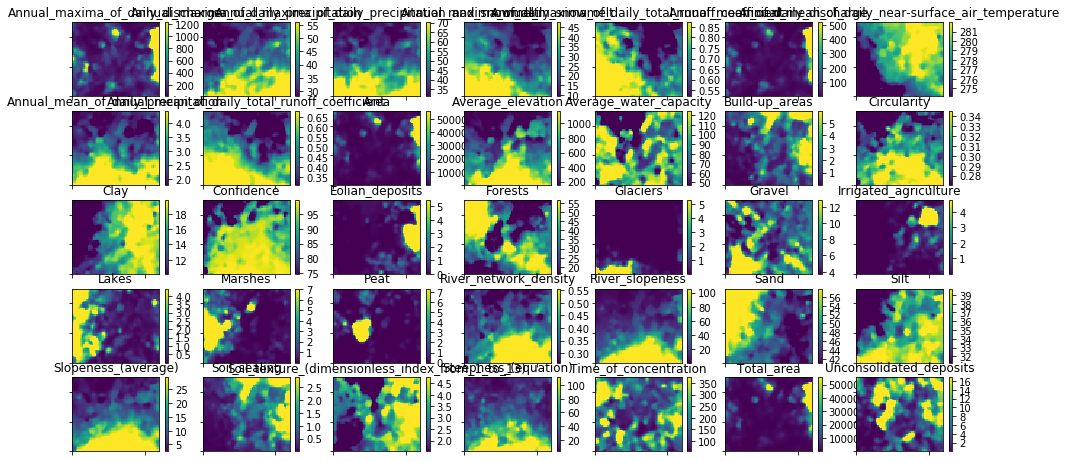

In [9]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(som, col_sz=7, which_dim="all", desnormalize=True)

In [66]:
codebook = som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

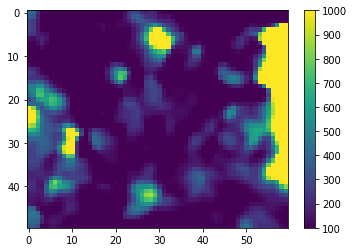

In [68]:
x_side = som.codebook.mapsize[0]
y_side = som.codebook.mapsize[1]
im = plt.imshow(codebook[:,0].reshape(x_side, y_side), vmin=100, vmax=1000)
plt.colorbar(im)
plt.show()

In [69]:
# xv, yv = np.meshgrid(np.linspace(0, 1, y_side), np.linspace(0, 1, x_side))
# grid = np.dstack((xv, yv)).reshape(-1, 2)

msz = som.codebook.mapsize
cents = som.bmu_ind_to_xy(np.arange(0, msz[0] * msz[1]))

yv = cents[:, 0]
xv = cents[:, 1]
xyv = cents[:, 2]  # coordinates

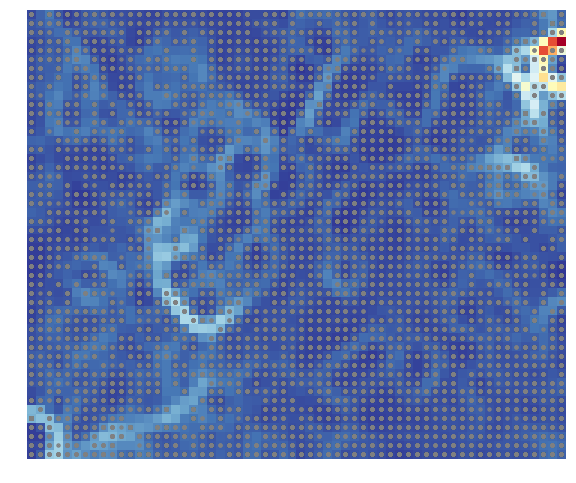

In [70]:
#But Umatrix finds the clusters easily
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

# #This is the Umat value
UMAT = u.build_u_matrix(som, distance=1, row_normalized=False)
UMAT2 = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)

In [71]:
codebook[:,0].reshape(x_side, y_side).shape

(50, 60)

In [72]:
xyv

array([   0,    1,    2, ..., 2997, 2998, 2999])

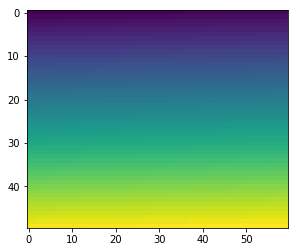

In [73]:
plt.imshow(xyv.reshape(x_side, y_side))

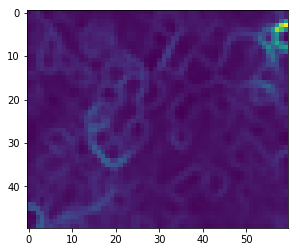

In [126]:
plt.imshow(UMAT.flatten('C').reshape(x_side, y_side))

In [75]:
# from itertools import product
# from string import ascii_lowercase
# keywords = [''.join(i) for i in product(ascii_lowercase, repeat = 2)]
# keywords = keywords[0:len(df.columns)]

In [76]:
df_cb = pd.DataFrame(data=codebook, columns=df.columns.str.replace('_',' '))#keywords)
df_cb['U-matrix'] = UMAT.flatten('C')
df_cb['X'] = xv
df_cb['Y'] = yv
df_cb['XY'] = xyv


In [77]:
df_cb.head()

Annual maxima of daily discharge  Annual maxima of daily precipitation  \
0                        438.545375                             26.433832   
1                        402.571275                             26.427351   
2                        207.348593                             26.452852   
3                        107.808791                             26.416372   
4                        105.812769                             26.584601   

   Annual maxima of daily precipitation and snowmelt  \
0                                          30.981788   
1                                          30.858926   
2                                          30.265832   
3                                          30.029064   
4                                          30.098971   

   Annual maxima of daily snowmelt  \
0                        20.548446   
1                        20.375229   
2                        20.007551   
3                        20.171992   
4                        19.980844   

   Annual maxima of daily total runoff coefficient  \
0                                         0.704490   
1                                         0.703976   
2                                         0.712501   
3                                         0.725742   
4                                         0.717701   

   Annual mean of daily discharge  \
0                      267.447837   
1                      244.081652   
2                      111.256360   
3                       36.533415   
4                       33.951561   

   Annual mean of daily near-surface air temperature  \
0                                         275.424394   
1                                         275.647311   
2                                         276.954156   
3                                         277.639091   
4                                         277.607589   

   Annual mean of daily precipitation  \
0                            1.781125   
1                            1.782585   
2                            1.766048   
3                            1.738153   
4                            1.739869   

   Annual mean of daily total runoff coefficient          Area ...  \
0                                       0.395504  27942.940684 ...   
1                                       0.394443  25573.924635 ...   
2                                       0.390064  12403.757741 ...   
3                                       0.391869   5221.266110 ...   
4                                       0.392979   4934.037130 ...   

   Soil sealing  Soil texture (dimensionless index from 1 to 13)  \
0      0.289779                                         2.502449   
1      0.303845                                         2.600666   
2      0.464949                                         3.537151   
3      0.574677                                         4.187756   
4      0.541994                                         4.155023   

   Steepness (equation)  Time of concentration    Total area  \
0              7.743497             365.752804  26038.041320   
1              7.685169             354.002854  23851.664382   
2              6.557759             312.900986  11804.839476   
3              5.618332             259.205987   5353.635128   
4              5.903643             222.344023   5135.892697   

   Unconsolidated deposits  U-matrix  X  Y  XY  
0                16.372597  0.414921  0  0   0  
1                15.798362  0.805246  1  0   1  
2                11.496868  1.105218  2  0   2  
3                 7.020560  0.633277  3  0   3  
4                 4.887410  0.300612  4  0   4  

[5 rows x 39 columns]

In [78]:
#df.columns = keywords
df['WSO1_ID'] = shp_key.values
df['som_key'] = som._bmu[0]

In [79]:
# outjson_raw = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments//ruwedata.json'
# outgzip_raw = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments//ruwedata.gzip'
# df.to_json(outjson_raw, orient='records')
# df.to_json(outgzip_raw, orient='records', compression='gzip')

In [80]:
import geopandas as gpd

In [81]:
shp_file_in = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\Stations_total_v3.shp'
gdf = gpd.read_file(shp_file_in)

GDAL_DATA: C:\Python35\Lib\site-packages\osgeo\data\gdal
PROJ data files not located, PROJ_LIB not set
Got coordinate system
Failed to auto identify EPSG: 7
Params: b'+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs '
Index: 0
Got coordinate system
Flushed buffer
Stopped session


In [103]:
gdf.crs

{'ellps': 'GRS80',
 'lat_0': 52,
 'lon_0': 10,
 'no_defs': True,
 'proj': 'laea',
 'units': 'm',
 'x_0': 4321000,
 'y_0': 3210000}

In [104]:
# Let's take a copy of our layer
gdf_proj = gdf.copy()

# Reproject the geometries by replacing the values with projected ones
gdf_proj['geometry'] = gdf_proj['geometry'].to_crs(epsg=4326)

In [105]:
gdf_proj.head()

OBJECTID        station  WSO1_ID        ID  Startår    AREA1 Country  \
0      1384         polmak   881297  234180.0     1958  14161.4  Norway   
1      1385        karpelv   882594   24730.0     1958    128.9  Norway   
2      1473  manndalen_bru  1059001   20630.0     1958    200.5  Norway   
3      1472           masi  1058709  212100.0     1958   5620.8  Norway   
4      1471     skogfjordv  1057779  200401.0     1958    136.0  Norway   

   Available  AREA_CCM2  Dat50_2005  Window Validation    Compar  \
0          8    13842.0          48    2007          Y  0.441942   
1          8      129.0          48    2007          Y  0.984053   
2          8      210.0          48    2008          Y  1.461290   
3          8     5547.0          48    2008          Y  0.665890   
4          8      134.0          48    2008          Y  0.690923   

                                      geometry  
0  POINT (28.01600773537002 70.07034472984779)  
1  POINT (30.38412065429519 69.65991119424054)  
2  POINT (20.52561920584574 69.52389132263326)  
3  POINT (23.63503629311039 69.42004089674433)  
4  POINT (19.10412411106691 69.98092589102815)

In [106]:
gdf = gdf_proj

In [107]:
gdf_merge_df = gdf.merge(df, on='WSO1_ID')

In [108]:
gdf_sel = gdf_merge_df.loc[:,['WSO1_ID', 'station', 'som_key', 'Country', 'geometry']]

In [109]:
som_key_all = np.sort(gdf_sel['som_key'].values)

In [110]:
unique, counts = np.unique(som_key_all, return_counts=True)

In [111]:
df_counts = pd.DataFrame(np.array((unique.astype(int), counts)).T, columns=['som_key_unique', 'Total stations'])

In [112]:
df_cb_counts = pd.merge(df_cb, df_counts, left_on='XY', right_on='som_key_unique', how='left')
df_cb_counts.drop('som_key_unique', axis=1,inplace=True)

In [113]:
df_cb_counts.head()

Annual maxima of daily discharge  Annual maxima of daily precipitation  \
0                        438.545375                             26.433832   
1                        402.571275                             26.427351   
2                        207.348593                             26.452852   
3                        107.808791                             26.416372   
4                        105.812769                             26.584601   

   Annual maxima of daily precipitation and snowmelt  \
0                                          30.981788   
1                                          30.858926   
2                                          30.265832   
3                                          30.029064   
4                                          30.098971   

   Annual maxima of daily snowmelt  \
0                        20.548446   
1                        20.375229   
2                        20.007551   
3                        20.171992   
4                        19.980844   

   Annual maxima of daily total runoff coefficient  \
0                                         0.704490   
1                                         0.703976   
2                                         0.712501   
3                                         0.725742   
4                                         0.717701   

   Annual mean of daily discharge  \
0                      267.447837   
1                      244.081652   
2                      111.256360   
3                       36.533415   
4                       33.951561   

   Annual mean of daily near-surface air temperature  \
0                                         275.424394   
1                                         275.647311   
2                                         276.954156   
3                                         277.639091   
4                                         277.607589   

   Annual mean of daily precipitation  \
0                            1.781125   
1                            1.782585   
2                            1.766048   
3                            1.738153   
4                            1.739869   

   Annual mean of daily total runoff coefficient          Area  \
0                                       0.395504  27942.940684   
1                                       0.394443  25573.924635   
2                                       0.390064  12403.757741   
3                                       0.391869   5221.266110   
4                                       0.392979   4934.037130   

        ...        Soil texture (dimensionless index from 1 to 13)  \
0       ...                                               2.502449   
1       ...                                               2.600666   
2       ...                                               3.537151   
3       ...                                               4.187756   
4       ...                                               4.155023   

   Steepness (equation)  Time of concentration    Total area  \
0              7.743497             365.752804  26038.041320   
1              7.685169             354.002854  23851.664382   
2              6.557759             312.900986  11804.839476   
3              5.618332             259.205987   5353.635128   
4              5.903643             222.344023   5135.892697   

   Unconsolidated deposits  U-matrix  X  Y  XY  Total stations  
0                16.372597  0.414921  0  0   0           273.0  
1                15.798362  0.805246  1  0   1             NaN  
2                11.496868  1.105218  2  0   2             1.0  
3                 7.020560  0.633277  3  0   3            69.0  
4                 4.887410  0.300612  4  0   4           240.0  

[5 rows x 40 columns]

In [114]:
gdf_dropdp = gdf_sel.drop_duplicates(subset = ['WSO1_ID', 'station', 'som_key', 'Country'])

In [115]:
gdf_dropdp.loc[:,'som_key'] = gdf_dropdp.loc[:,'som_key'].astype(int)

c:\python35\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [116]:
json_locs_out = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\stations_EU_discharge.json'
with open(json_locs_out, 'w') as f:
    f.write(gdf_dropdp.to_json())

In [117]:
csv_som_out = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\som_EU_discharge.csv'
df_cb_counts.to_csv(csv_som_out, index=False)

In [118]:
# TO DATAPORTAL
from hkvportal.io.services import dataportal as dp
dp = dp()

In [119]:
dp.setDataservice(dataservice = 'https://data.hkvservices.nl/dataservices/')

Init schema document for None
register_type('{http://www.w3.org/2001/XMLSchema}string', <zeep.xsd.types.builtins.String object at 0x000000002D02B080>)
register_type('{http://www.w3.org/2001/XMLSchema}boolean', <zeep.xsd.types.builtins.Boolean object at 0x00000000311B0B70>)
register_type('{http://www.w3.org/2001/XMLSchema}decimal', <zeep.xsd.types.builtins.Decimal object at 0x00000000311B0C18>)
register_type('{http://www.w3.org/2001/XMLSchema}float', <zeep.xsd.types.builtins.Float object at 0x00000000311B0A58>)
register_type('{http://www.w3.org/2001/XMLSchema}double', <zeep.xsd.types.builtins.Double object at 0x00000000311B0518>)
register_type('{http://www.w3.org/2001/XMLSchema}duration', <zeep.xsd.types.builtins.Duration object at 0x00000000311B0898>)
register_type('{http://www.w3.org/2001/XMLSchema}dateTime', <zeep.xsd.types.builtins.DateTime object at 0x00000000311B0F60>)
register_type('{http://www.w3.org/2001/XMLSchema}time', <zeep.xsd.types.builtins.Time object at 0x00000000311B0BE

dataservice is set. https://data.hkvservices.nl/dataservices/ will be used as portal


In [120]:
dp.createDatabase(database = 'EU_extreme_discharge')

Starting new HTTPS connection (1): data.hkvservices.nl
https://data.hkvservices.nl:443 "GET /dataservices/database.asmx/create?database=EU_extreme_discharge HTTP/1.1" 200 46


{'exception': 'database name already exists'}

In [121]:
# Vega specs vanuit bestand laden
import json
#vega_spec_path = r'D:\jupyter notebooks\3348.10 WAP Awash - Ethiopie\JSON-files\Awash_weredas.json'
vega_spec = json.load(open(json_locs_out))

In [122]:
# json data uploaden naar data portal
dp.setEntryDatabase(database = 'EU_extreme_discharge', key = 'stations', data = json.dumps(vega_spec), description = 'Stations EU extreme river discharges')

HTTP Post to https://data.hkvservices.nl/dataservices/data.asmx:
<?xml version='1.0' encoding='utf-8'?>
<soap-env:Envelope xmlns:soap-env="http://schemas.xmlsoap.org/soap/envelope/">
  <soap-env:Body>
    <ns0:create xmlns:ns0="http://tempuri.org/">
      <ns0:database>EU_extreme_discharge</ns0:database>
      <ns0:key>stations</ns0:key>
      <ns0:description>Stations EU extreme river discharges</ns0:description>
      <ns0:data>{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"som_key": 1690, "station": "polmak", "Country": "Norway", "WSO1_ID": 881297}, "geometry": {"type": "Point", "coordinates": [28.016007735370025, 70.07034472984779]}}, {"id": "4", "type": "Feature", "properties": {"som_key": 1629, "station": "polmak", "Country": "Norway", "WSO1_ID": 881297}, "geometry": {"type": "Point", "coordinates": [28.016007735370025, 70.07034472984779]}}, {"id": "33", "type": "Feature", "properties": {"som_key": 1630, "station": "polmak", "Country": "

{'date': '2017-12-14 21:24:38',
 'id': '427375c5-e768-41b3-9199-c0050d4defbe',
 'key': 'stations'}

In [99]:
import pandas as pd
from io import StringIO

In [135]:
df_cb_counts = df_cb_counts.applymap("{0:.3f}".format)

In [136]:
df_cb_counts.head()

Annual maxima of daily discharge Annual maxima of daily precipitation  \
0                          438.545                               26.434   
1                          402.571                               26.427   
2                          207.349                               26.453   
3                          107.809                               26.416   
4                          105.813                               26.585   

  Annual maxima of daily precipitation and snowmelt  \
0                                            30.982   
1                                            30.859   
2                                            30.266   
3                                            30.029   
4                                            30.099   

  Annual maxima of daily snowmelt  \
0                          20.548   
1                          20.375   
2                          20.008   
3                          20.172   
4                          19.981   

  Annual maxima of daily total runoff coefficient  \
0                                           0.704   
1                                           0.704   
2                                           0.713   
3                                           0.726   
4                                           0.718   

  Annual mean of daily discharge  \
0                        267.448   
1                        244.082   
2                        111.256   
3                         36.533   
4                         33.952   

  Annual mean of daily near-surface air temperature  \
0                                           275.424   
1                                           275.647   
2                                           276.954   
3                                           277.639   
4                                           277.608   

  Annual mean of daily precipitation  \
0                              1.781   
1                              1.783   
2                              1.766   
3                              1.738   
4                              1.740   

  Annual mean of daily total runoff coefficient       Area      ...        \
0                                         0.396  27942.941      ...         
1                                         0.394  25573.925      ...         
2                                         0.390  12403.758      ...         
3                                         0.392   5221.266      ...         
4                                         0.393   4934.037      ...         

  Soil texture (dimensionless index from 1 to 13) Steepness (equation)  \
0                                           2.502                7.743   
1                                           2.601                7.685   
2                                           3.537                6.558   
3                                           4.188                5.618   
4                                           4.155                5.904   

  Time of concentration Total area Unconsolidated deposits U-matrix      X  \
0               365.753  26038.041                  16.373    0.415  0.000   
1               354.003  23851.664                  15.798    0.805  1.000   
2               312.901  11804.839                  11.497    1.105  2.000   
3               259.206   5353.635                   7.021    0.633  3.000   
4               222.344   5135.893                   4.887    0.301  4.000   

       Y     XY Total stations  
0  0.000  0.000        273.000  
1  0.000  1.000            nan  
2  0.000  2.000          1.000  
3  0.000  3.000         69.000  
4  0.000  4.000        240.000  

[5 rows x 40 columns]

In [143]:
df_cb_counts.loc[:,['X','Y','XY']] = df_cb_counts.loc[:,['X','Y','XY']].astype(int)

In [144]:
df_cb_counts.head()

Annual maxima of daily discharge Annual maxima of daily precipitation  \
0                          438.545                               26.434   
1                          402.571                               26.427   
2                          207.349                               26.453   
3                          107.809                               26.416   
4                          105.813                               26.585   

  Annual maxima of daily precipitation and snowmelt  \
0                                            30.982   
1                                            30.859   
2                                            30.266   
3                                            30.029   
4                                            30.099   

  Annual maxima of daily snowmelt  \
0                          20.548   
1                          20.375   
2                          20.008   
3                          20.172   
4                          19.981   

  Annual maxima of daily total runoff coefficient  \
0                                           0.704   
1                                           0.704   
2                                           0.713   
3                                           0.726   
4                                           0.718   

  Annual mean of daily discharge  \
0                        267.448   
1                        244.082   
2                        111.256   
3                         36.533   
4                         33.952   

  Annual mean of daily near-surface air temperature  \
0                                           275.424   
1                                           275.647   
2                                           276.954   
3                                           277.639   
4                                           277.608   

  Annual mean of daily precipitation  \
0                              1.781   
1                              1.783   
2                              1.766   
3                              1.738   
4                              1.740   

  Annual mean of daily total runoff coefficient       Area      ...        \
0                                         0.396  27942.941      ...         
1                                         0.394  25573.925      ...         
2                                         0.390  12403.758      ...         
3                                         0.392   5221.266      ...         
4                                         0.393   4934.037      ...         

  Soil texture (dimensionless index from 1 to 13) Steepness (equation)  \
0                                           2.502                7.743   
1                                           2.601                7.685   
2                                           3.537                6.558   
3                                           4.188                5.618   
4                                           4.155                5.904   

  Time of concentration Total area Unconsolidated deposits U-matrix  X  Y XY  \
0               365.753  26038.041                  16.373    0.415  0  0  0   
1               354.003  23851.664                  15.798    0.805  1  0  1   
2               312.901  11804.839                  11.497    1.105  2  0  2   
3               259.206   5353.635                   7.021    0.633  3  0  3   
4               222.344   5135.893                   4.887    0.301  4  0  4   

  Total stations  
0        273.000  
1            nan  
2          1.000  
3         69.000  
4        240.000  

[5 rows x 40 columns]

In [145]:
#output = io.BytesIO()
output = StringIO()
df_cb_counts.to_csv(output, index=False)

In [146]:
dp.setEntryDatabase(database = 'EU_extreme_discharge', key = 'som', data = output.getvalue(), description = 'Self-organizing map EU extreme river discharges')

HTTP Post to https://data.hkvservices.nl/dataservices/data.asmx:
<?xml version='1.0' encoding='utf-8'?>
<soap-env:Envelope xmlns:soap-env="http://schemas.xmlsoap.org/soap/envelope/">
  <soap-env:Body>
    <ns0:create xmlns:ns0="http://tempuri.org/">
      <ns0:database>EU_extreme_discharge</ns0:database>
      <ns0:key>som</ns0:key>
      <ns0:description>Self-organizing map EU extreme river discharges</ns0:description>
      <ns0:data>Annual maxima of daily discharge,Annual maxima of daily precipitation,Annual maxima of daily precipitation and snowmelt,Annual maxima of daily snowmelt,Annual maxima of daily total runoff coefficient,Annual mean of daily discharge,Annual mean of daily near-surface air temperature,Annual mean of daily precipitation,Annual mean of daily total runoff coefficient,Area,Average elevation,Average water capacity,Build-up areas,Circularity,Clay,Confidence,Eolian deposits,Forests,Glaciers,Gravel,Irrigated agriculture,Lakes,Marshes,Peat,River network density,River 

{'date': '2017-12-14 22:11:56',
 'id': '57439ecb-7d54-447f-93f3-3671ed3ce4b7',
 'key': 'som'}

In [153]:
# Vega specs vanuit bestand laden
import json
vega_spec_path = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\vega3_EU_discharge.json'
vega_spec_SOM = json.load(open(vega_spec_path))

In [154]:
# json data uploaden naar data portal
dp.setEntryDatabase(database = 'EU_extreme_discharge', key = 'vegaspec', data = json.dumps(vega_spec_SOM), description = 'Vega3 specification EU extreme river discharges')

HTTP Post to https://data.hkvservices.nl/dataservices/data.asmx:
<?xml version='1.0' encoding='utf-8'?>
<soap-env:Envelope xmlns:soap-env="http://schemas.xmlsoap.org/soap/envelope/">
  <soap-env:Body>
    <ns0:create xmlns:ns0="http://tempuri.org/">
      <ns0:database>EU_extreme_discharge</ns0:database>
      <ns0:key>vegaspec</ns0:key>
      <ns0:description>Vega3 specification EU extreme river discharges</ns0:description>
      <ns0:data>{"legends": [{"type": "gradient", "fill": "color", "orient": "bottom-left", "title": {"signal": "parameter"}, "encode": {"title": {"update": {"limit": {"value": 400}, "fontSize": {"value": 14}}}}}], "signals": [{"value": 8, "name": "matrix_x_step"}, {"update": "bandspace(domain('matrix_x').length, 0, 0) * matrix_x_step", "name": "matrix_width"}, {"value": 8, "name": "matrix_y_step"}, {"update": "bandspace(domain('matrix_y').length, 0, 0) * matrix_y_step", "name": "matrix_height"}, {"value": 0, "name": "matrix_x"}, {"value": 0, "name": "matrix_y"}, {

{'date': '2017-12-14 22:49:54',
 'id': 'def5f429-fe8c-4a87-b4ea-469c0fcbd6aa',
 'key': 'vegaspec'}

#### END